# Data Exploration - Undersampled Data + Independent Chi-Squares Analysis

In [2]:
#Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import datetime as dt
import scipy as scp
from scipy import stats
from scipy.stats import ttest_ind

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [4]:
# import dataset
balancedMF = pd.read_csv('../Data/balancedMF.csv')

In [5]:
# Drop Unnamed:0 col
balancedMF.drop('Unnamed: 0', axis=1, inplace=True) 

In [4]:
# sort dataFrame by genderR column to cross check original values
balancedMF2= balancedMF.sort_values('genderR')

In [5]:
balancedMF2

,totalIncome,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus,ownsCarR,ownsRealtyR,eduLvlR,incomeTypeR,housingTypeR,famStatusR,genderR
0,238500.0,2.0,47.0,13.599184,1,1,0,1,0,0,1,1,0
3170,202500.0,3.0,38.0,6.926905,1,1,1,1,1,3,1,0,0
3169,180000.0,2.0,43.0,3.280013,1,1,1,1,1,1,1,1,0
3168,247500.0,2.0,42.0,1.533228,1,0,0,1,1,1,1,1,0
3167,117000.0,2.0,26.0,2.817306,1,1,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,135000.0,3.0,43.0,7.293784,1,1,0,0,1,0,5,1,1
6329,135000.0,2.0,50.0,9.538868,1,1,1,0,1,0,1,1,1
6328,135000.0,2.0,50.0,9.538868,1,0,1,0,1,0,1,1,1
6326,540000.0,2.0,48.0,16.706709,1,0,1,0,0,1,1,1,1


In [6]:
balancedMF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   totalIncome   9500 non-null   float64
 1   famSize       9500 non-null   float64
 2   ageYrs        9500 non-null   float64
 3   yrsEmpl       9500 non-null   float64
 4   UNEMPLOYED    9500 non-null   int64  
 5   ApprStatus    9500 non-null   int64  
 6   ownsCarR      9500 non-null   int64  
 7   ownsRealtyR   9500 non-null   int64  
 8   eduLvlR       9500 non-null   int64  
 9   incomeTypeR   9500 non-null   int64  
 10  housingTypeR  9500 non-null   int64  
 11  famStatusR    9500 non-null   int64  
 12  genderR       9500 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 965.0 KB


In [7]:
balancedMF.describe()

,totalIncome,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus,ownsCarR,ownsRealtyR,eduLvlR,incomeTypeR,housingTypeR,famStatusR,genderR
count,9.500000e+03,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,1.907839e+05,2.215474,43.254211,5.872936,0.866737,0.521789,0.430842,0.655474,0.804842,0.740105,1.166421,1.268842,0.500000
std,1.029051e+05,0.943834,11.341065,6.214874,0.339877,0.499551,0.495220,0.475239,0.563868,0.953897,0.640255,0.820786,0.500026
min,2.700000e+04,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.260000e+05,2.000000,34.000000,1.284078,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.710000e+05,2.000000,42.000000,4.098647,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.500000
75%,2.250000e+05,3.000000,52.000000,8.380733,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.575000e+06,20.000000,69.000000,43.020733,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,4.000000,1.000000


### Looks like we didn't lose any of our data and our stats have not been altered. So far so good!

<AxesSubplot:>

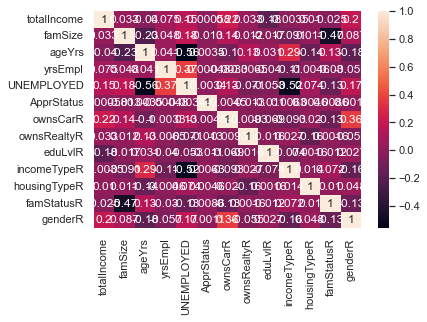

In [8]:
# See what the heatmap for this dataset looks like
sns.heatmap(balancedMF.corr(), annot=True)

balancedMF.corr()

### The correlation plot shows a couple of interesting things. Age and UNEMPLOYMENT have a negative correlation, meaning as a person gets older, they're more likely to have a job.  Income type and unemployed are also negatively correlated.

## Continuous Variables Distribution

Text(0.5, 1.0, 'M/F Balanced Applicant Income Distribution')

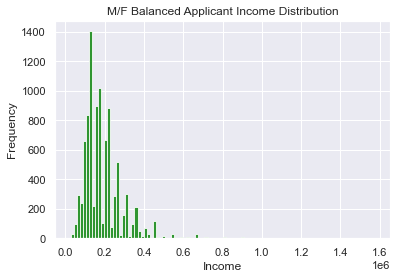

In [9]:
num_bins = 100
n, bins, patches = plt.hist(balancedMF['totalIncome'], num_bins, facecolor='green', alpha = .8)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('M/F Balanced Applicant Income Distribution')

<AxesSubplot:>

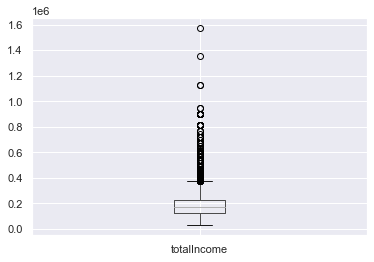

In [10]:
balancedMF.boxplot('totalIncome')

<AxesSubplot:>

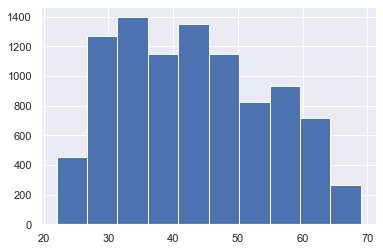

In [11]:
balancedMF['ageYrs'].hist()

<AxesSubplot:>

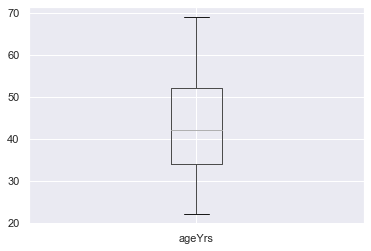

In [12]:
balancedMF.boxplot('ageYrs')

In [13]:
# Categorical Variables Distribution

<AxesSubplot:>

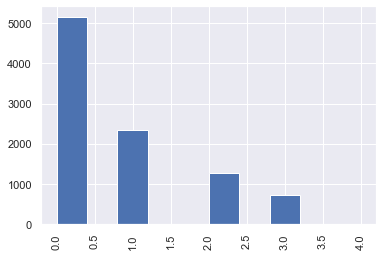

In [14]:
balancedMF['incomeTypeR'].hist(xrot=90)

In [15]:
# 0 = working, 1 = Commercial Associate, 2 = Pensioner, 3 = State Servant, 4 = Student

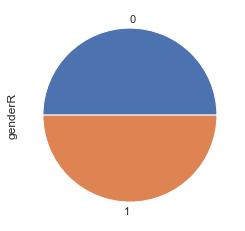

In [16]:
g1 = balancedMF.groupby('genderR')['genderR'].count().plot(kind='pie', y='genderR')

# Data Insights

## Do males or females make more money on average? Independent t-Test 


<AxesSubplot:>

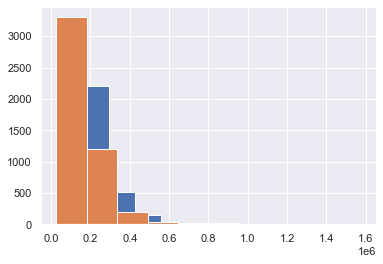

In [21]:
# Test normal distribution of each
balancedMF.totalIncome[balancedMF.genderR == 1].hist()
balancedMF.totalIncome[balancedMF.genderR == 0].hist()

In [29]:
# run the analysis
ttest_ind(balancedMF.totalIncome[balancedMF.genderR == 1], balancedMF.totalIncome[balancedMF.genderR ==0])

Ttest_indResult(statistic=19.946834533049635, pvalue=9.392523984156663e-87)

## Since p value is <.05, there is a significant difference in total income between males and females in this dataset. Examine the means to see where the differences lie:

In [24]:
balancedMF.totalIncome[balancedMF.genderR == 1].mean()

211416.7869473684

In [25]:
balancedMF.totalIncome[balancedMF.genderR == 0].mean()

170150.9229473684

## Males make quite a bit more money on average than females in this dataset. Try removing the total income outliers and re-run to see if there's a difference.

In [27]:
def dropOL(ftr):
    q75,q25 = np.percentile(balancedMF[ftr],[75,25])
    intr_qr = q75-q25
    mx = q75+(1.5*intr_qr)
    mn = q25-(1.5*intr_qr)
    return mx,mn

In [28]:
mx,mn = dropOL('totalIncome')

In [31]:
balancedMF.drop(balancedMF[balancedMF.totalIncome > mx].index,inplace=True)

In [32]:
ttest_ind(balancedMF.totalIncome[balancedMF.genderR == 1], balancedMF.totalIncome[balancedMF.genderR ==0])

Ttest_indResult(statistic=22.585543015557697, pvalue=6.264067307897963e-110)

In [33]:
balancedMF.totalIncome[balancedMF.genderR == 1].mean()

192503.1369955157

In [34]:
balancedMF.totalIncome[balancedMF.genderR == 0].mean()

159470.5853976532

## After removing the total income outliers, males still have a significantly higher income than females.

### Is one gender more likely to get approved for a credit card than the other? Independent Chi Square

In [28]:
# Ho = No difference in approval rate
# Ha = Gender does have an effect on approval rate

crosstab = pd.crosstab(balancedMF['genderR'], balancedMF['ApprStatus'])

In [29]:
crosstab

ApprStatus,0,1
genderR,,
0,2274,2476
1,2269,2481


### we passed the assumption of having at least 5 entries per cell.

In [30]:
# determine if the frequencies differ by creating the contingency table

stats.chi2_contingency(crosstab)

(0.006749660552021876,
 0.9345224093234461,
 1,
 array([[2271.5, 2478.5],
        [2271.5, 2478.5]]))

### Our p value of 0.93 indicates that there is not a significant difference in approval rates between males and females in this dataset.

## Does unemployment status affect approval rate? Independent Chi Square

In [32]:
# Ho = No difference in approval rate between employed and unemployed
# Ha = UNEMPLOYMENT does have an effect on approval rate

crosstab2 = pd.crosstab(balancedMF['UNEMPLOYED'], balancedMF['ApprStatus'])

In [33]:
crosstab2

ApprStatus,0,1
UNEMPLOYED,,
0,600,666
1,3943,4291


### We've passed the assumption of having at least 5 cases per cell.

In [34]:
# determine if the frequencies differ by creating the contingency table

stats.chi2_contingency(crosstab2)

(0.08821205135897162,
 0.7664625873086189,
 1,
 array([[ 605.41452632,  660.58547368],
        [3937.58547368, 4296.41452632]]))

### No signiicant difference in application approval between EMPLOYED and UNEMPLOYED.

## Does income type affect approval rate? Independent Chi Square

In [36]:
# Ho = No difference in approval rate
# Ha = Income type does have an effect on approval rate

crosstab3 = pd.crosstab(balancedMF['incomeTypeR'], balancedMF['ApprStatus'])

In [37]:
crosstab3

ApprStatus,0,1
incomeTypeR,,
0,2479,2686
1,1126,1223
2,608,670
3,328,378
4,2,0


### We do not pass the assumption for independent chi-squares due to incomeType 4 (Student) not having at least 5 cases per cell

## Does education level affect approval rate? Independent Chi Square

In [39]:
# Ho = No difference in approval rate
# Ha = Education level does have an effect on approval rate

crosstab4 = pd.crosstab(balancedMF['eduLvlR'], balancedMF['ApprStatus'])

In [40]:
crosstab4

ApprStatus,0,1
eduLvlR,,
0,1164,1322
1,3137,3371
2,182,204
3,56,58
4,4,2


### We do not pass the assumption for independent chi-squares due to education level 4 (Academic Degree) not having at least 5 cases per cell

## Does family status have an effect on approval rate? Independent Chi Square

In [42]:
# Ho = No difference in approval rate
# Ha = Whether or not someone is married does have an effect on approval rate

crosstab5 = pd.crosstab(balancedMF['famStatusR'], balancedMF['ApprStatus'])

In [43]:
crosstab5

ApprStatus,0,1
famStatusR,,
0,374,411
1,3145,3389
2,638,708
3,234,278
4,152,171


### We pass the assumption of having at least 5 cases per cell.

In [44]:
# determine if the frequencies differ by creating the contingency table

stats.chi2_contingency(crosstab5)

(1.3558762119144314,
 0.8518265231624831,
 4,
 array([[ 375.39526316,  409.60473684],
        [3124.62757895, 3409.37242105],
        [ 643.67136842,  702.32863158],
        [ 244.84378947,  267.15621053],
        [ 154.462     ,  168.538     ]]))

## no significant difference in approval due to an applicant's family status

### Does Housing type have an effect on approval rate?  Independent  Chi Square

In [8]:
# Ho = No difference in approval rate
# Ha = Housing Type does have an effect on approval rate

crosstab6 = pd.crosstab(balancedMF['housingTypeR'], balancedMF['ApprStatus'])

In [9]:
crosstab6

ApprStatus,0,1
housingTypeR,,
0,84,79
1,4023,4398
2,140,160
3,240,249
4,18,24
5,38,47


### We pass the assumption of having at least 5 per cell

In [11]:
# determine if the frequencies differ by creating the contingency table

stats.chi2_contingency(crosstab6)

(2.1241086291628055,
 0.8317194408285541,
 5,
 array([[  77.94831579,   85.05168421],
        [4027.01084211, 4393.98915789],
        [ 143.46315789,  156.53684211],
        [ 233.84494737,  255.15505263],
        [  20.08484211,   21.91515789],
        [  40.64789474,   44.35210526]]))

## housing type does not have a significant effect on approval rate

## Does owning a car affect approval rate? Independent Chi Square

In [13]:
# Ho = No difference in approval rate
# Ha = Owning a car does have an effect on approval rate

crosstab7 = pd.crosstab(balancedMF['ownsCarR'], balancedMF['ApprStatus'])

In [14]:
# determine if the frequencies differ by creating the contingency table

stats.chi2_contingency(crosstab7)

(0.17843282867051583,
 0.6727235163114864,
 1,
 array([[2585.68431579, 2821.31568421],
        [1957.31568421, 2135.68431579]]))

### Since p value is >.05, there is no significant effect of having a car or not on credit card approval..

## Does owning realty affect approval rate? Independent Chi Square

In [15]:
# Ho = No difference in approval rate
# Ha = Owning realty does have an effect on approval rate

crosstab8 = pd.crosstab(balancedMF['ownsRealtyR'], balancedMF['ApprStatus'])

In [16]:
# determine if the frequencies differ by creating the contingency table

stats.chi2_contingency(crosstab8)

(1.5368625529659885,
 0.21508541266234027,
 1,
 array([[1565.18305263, 1707.81694737],
        [2977.81694737, 3249.18305263]]))

### Since p value is >.05, there is no significant effect of owning realty or not on credit card approval..

## Additional Data Exploration Plots

#### To create user friendly plots, recode binary variables back to categorical and add columns to end of balancedMF data frame

In [38]:
def genderRecode (series):
    if series == 0:
        return "F"
    if series == 1:
        return "M"
balancedMF['gender'] = balancedMF['genderR'].apply(genderRecode)

In [39]:
balancedMF.head()

,totalIncome,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus,ownsCarR,ownsRealtyR,eduLvlR,incomeTypeR,housingTypeR,famStatusR,genderR,gender
0,238500.0,2.0,47.0,13.599184,1,1,0,1,0,0,1,1,0,F
1,135000.0,3.0,41.0,4.799551,1,0,1,1,1,0,1,1,0,F
2,157500.0,2.0,40.0,12.506759,1,0,0,1,1,0,1,1,0,F
3,225000.0,2.0,24.0,0.257363,1,1,0,1,2,1,1,0,0,F
4,67500.0,2.0,37.0,3.263585,1,1,0,1,1,0,1,2,0,F


In [40]:
def carRecode (series):
    if series == 0:
        return "N"
    if series == 1:
        return "Y"
balancedMF['ownsCar'] = balancedMF['ownsCarR'].apply(carRecode)

In [47]:
def employed (series):
    if series == 0:
        return "Y"
    if series == 1:
        return "N"
balancedMF['Unemployed'] = balancedMF['UNEMPLOYED'].apply(employed)

In [49]:
def approval (series):
    if series == 0:
        return "N"
    if series == 1:
        return "Y"
balancedMF['ApprovalStatus'] = balancedMF['ApprStatus'].apply(approval)

In [41]:
def realtyRecode (series):
    if series == 0:
        return "N"
    if series == 1:
        return "Y"
balancedMF['ownsRealty'] = balancedMF['ownsRealtyR'].apply(realtyRecode)

In [42]:
def eduR (series):
    if series == 0:
        return "Higher Education"
    if series == 1:
        return "Secondary/Secondary Special"
    if series == 2:
        return "Incomplete Higher"
    if series == 3:
        return "Lower Secondary"
    if series == 4:
        return "Academic Degree"
    
balancedMF['eduLvl'] = balancedMF['eduLvlR'].apply(eduR)

In [43]:
def incR (series):
    if series == 0:
        return "Working"
    if series == 1:
        return "Commercial Associate"
    if series == 2:
        return "Pensioner"
    if series == 3:
        return "State Servant"
    if series == 4:
        return "Student"
    
balancedMF['incomeType'] = balancedMF['incomeTypeR'].apply(incR)

In [44]:
def housR (series):
    if series == 0:
        return "Rented Apartment"
    if series == 1:
        return "House/Apartment"
    if series == 2:
        return "Municipal Apartment"
    if series == 3:
        return "With Parents"
    if series == 4:
        return "Co-Op Apartment"
    if series == 5:
        return "Office Apartment"
    
balancedMF['housingType'] = balancedMF['housingTypeR'].apply(housR)

In [45]:
def famR (series):
    if series == 0:
        return "Civil Marriage"
    if series == 1:
        return "Married"
    if series == 2:
        return "Single/Not Married"
    if series == 3:
        return "Separated"
    if series == 4:
        return "Widow"
  
    
balancedMF['famStatus'] = balancedMF['famStatusR'].apply(famR)

In [50]:
balancedMF.head()

,totalIncome,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus,ownsCarR,ownsRealtyR,eduLvlR,incomeTypeR,...,genderR,gender,ownsCar,ownsRealty,eduLvl,incomeType,housingType,famStatus,Unemployed,ApprovalStatus
0,238500.0,2.0,47.0,13.599184,1,1,0,1,0,0,...,0,F,N,Y,Higher Education,Working,House/Apartment,Married,N,Y
1,135000.0,3.0,41.0,4.799551,1,0,1,1,1,0,...,0,F,Y,Y,Secondary/Secondary Special,Working,House/Apartment,Married,N,N
2,157500.0,2.0,40.0,12.506759,1,0,0,1,1,0,...,0,F,N,Y,Secondary/Secondary Special,Working,House/Apartment,Married,N,N
3,225000.0,2.0,24.0,0.257363,1,1,0,1,2,1,...,0,F,N,Y,Incomplete Higher,Commercial Associate,House/Apartment,Civil Marriage,N,Y
4,67500.0,2.0,37.0,3.263585,1,1,0,1,1,0,...,0,F,N,Y,Secondary/Secondary Special,Working,House/Apartment,Single/Not Married,N,Y


In [54]:
# create dataframe for balanced data set showing reverse dummy categorical variables
balancedCat = balancedMF[['totalIncome', 'famSize', 'ageYrs', 'yrsEmpl', 'gender', 'ownsCar', 'ownsRealty', 'eduLvl', 'incomeType', 'housingType', 'famStatus', 'Unemployed', 'ApprovalStatus']]

In [55]:
balancedCat.head()

,totalIncome,famSize,ageYrs,yrsEmpl,gender,ownsCar,ownsRealty,eduLvl,incomeType,housingType,famStatus,Unemployed,ApprovalStatus
0,238500.0,2.0,47.0,13.599184,F,N,Y,Higher Education,Working,House/Apartment,Married,N,Y
1,135000.0,3.0,41.0,4.799551,F,Y,Y,Secondary/Secondary Special,Working,House/Apartment,Married,N,N
2,157500.0,2.0,40.0,12.506759,F,N,Y,Secondary/Secondary Special,Working,House/Apartment,Married,N,N
3,225000.0,2.0,24.0,0.257363,F,N,Y,Incomplete Higher,Commercial Associate,House/Apartment,Civil Marriage,N,Y
4,67500.0,2.0,37.0,3.263585,F,N,Y,Secondary/Secondary Special,Working,House/Apartment,Single/Not Married,N,Y


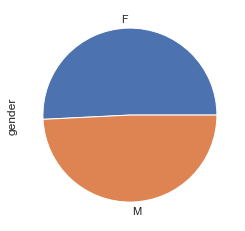

In [58]:
g10 = balancedCat.groupby('gender')['gender'].count().plot(kind='pie', y='Gender')

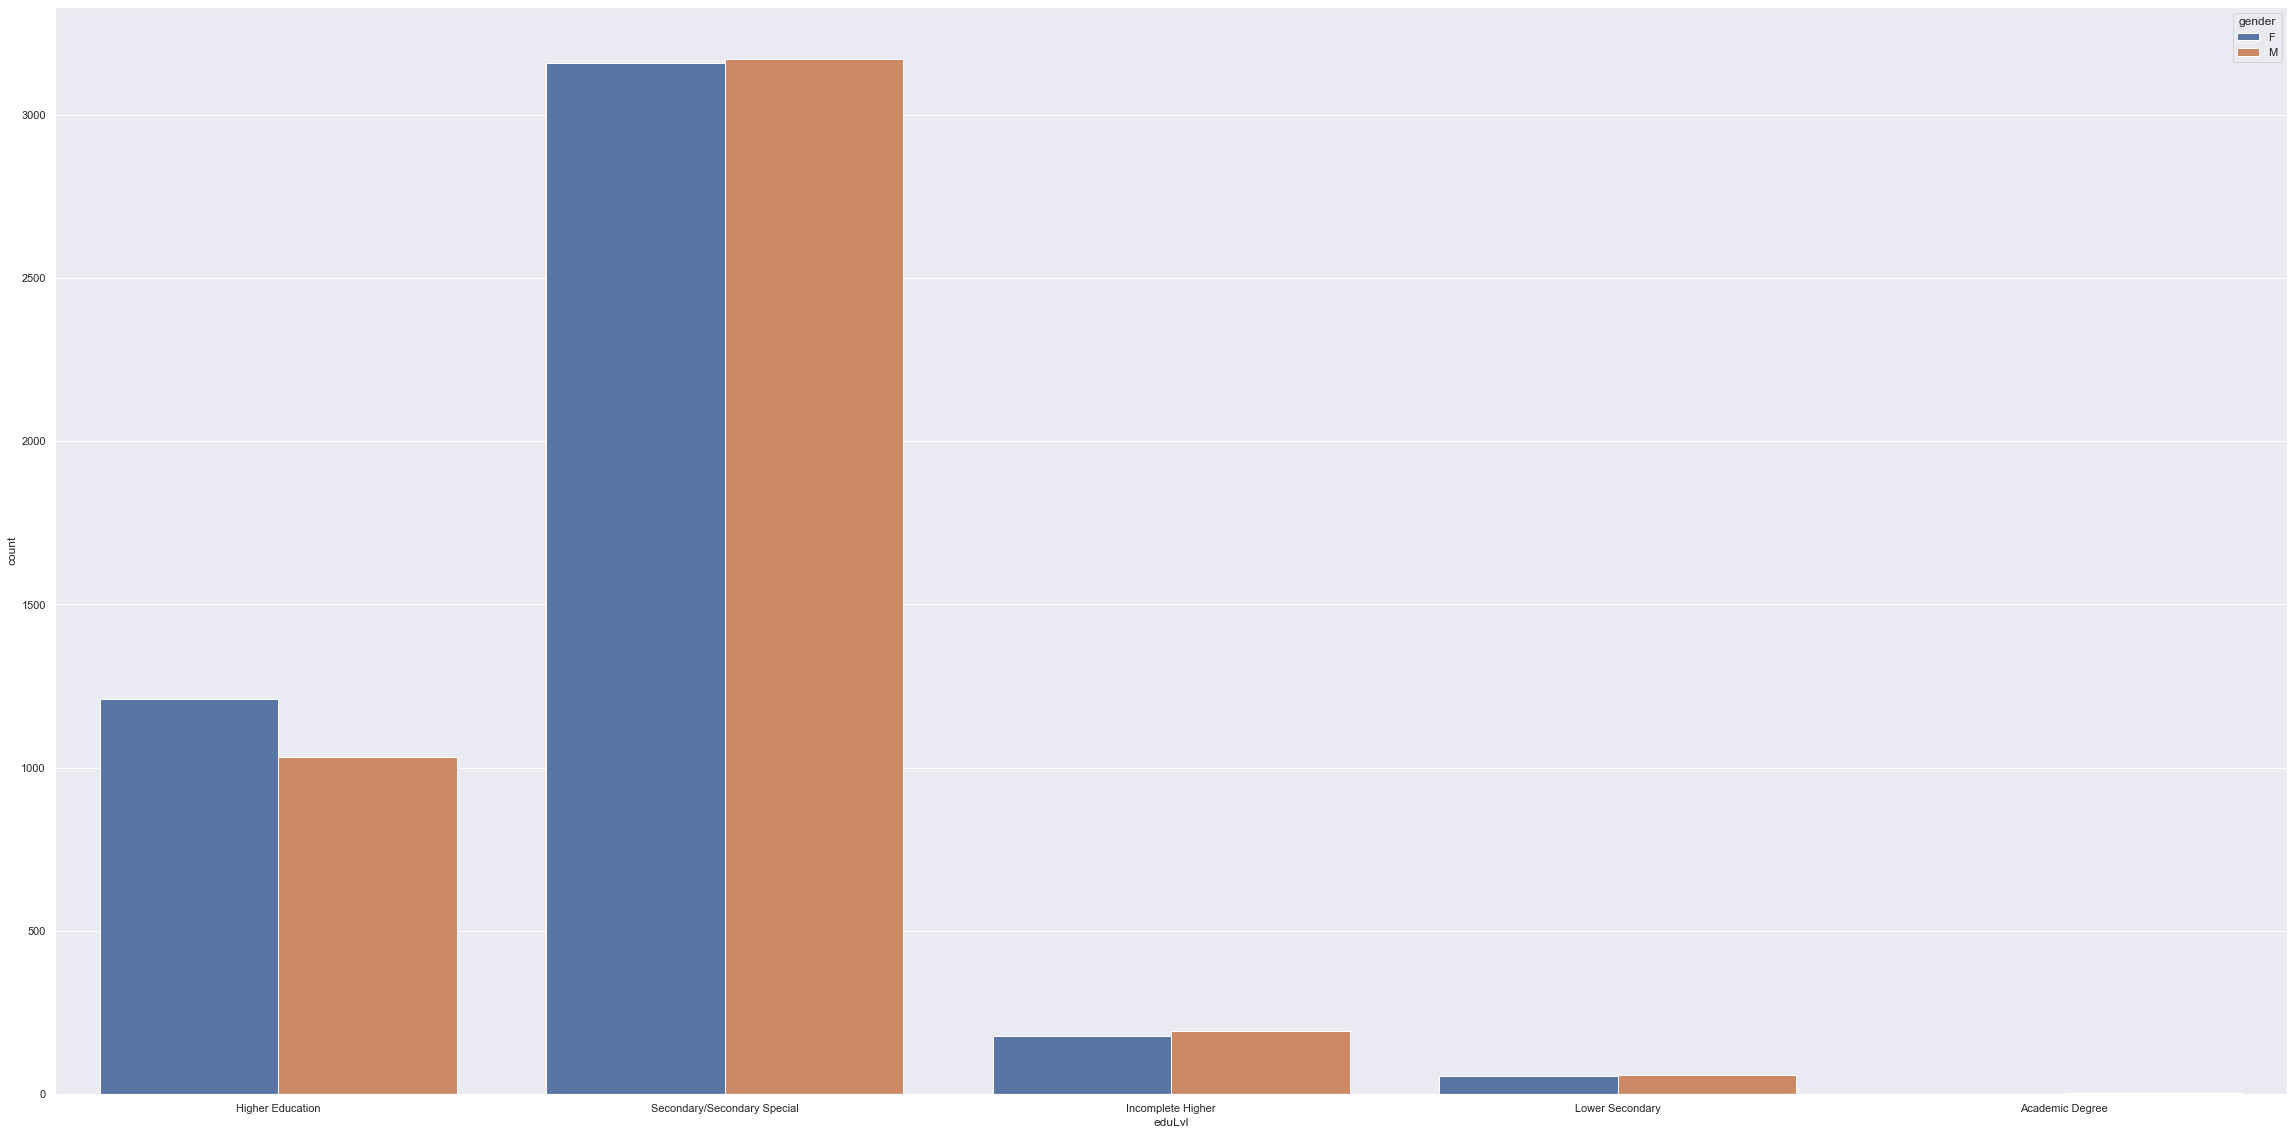

In [73]:
sns.countplot(x='eduLvl',hue='gender',data=balancedCat)
rcParams['figure.figsize'] = 300, 20

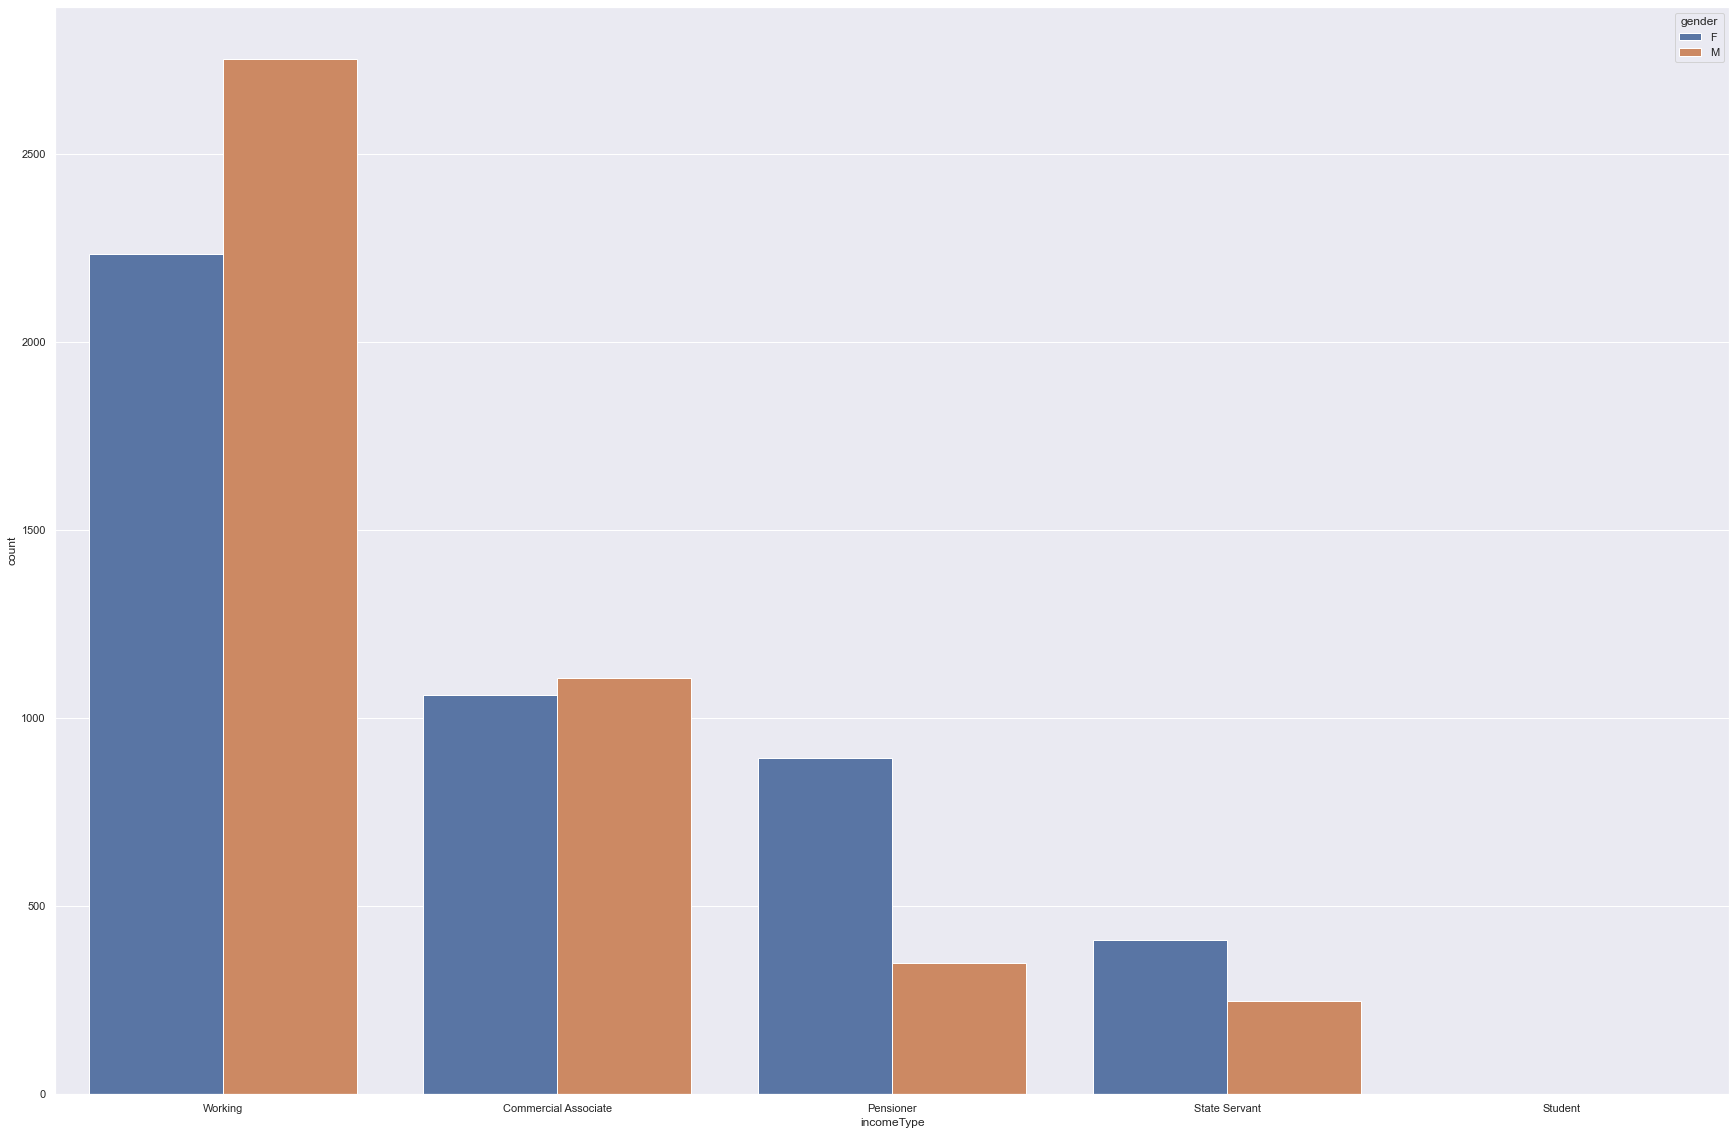

In [76]:
sns.countplot(x='incomeType',hue='gender',data=balancedCat)
rcParams['figure.figsize'] = 30, 10

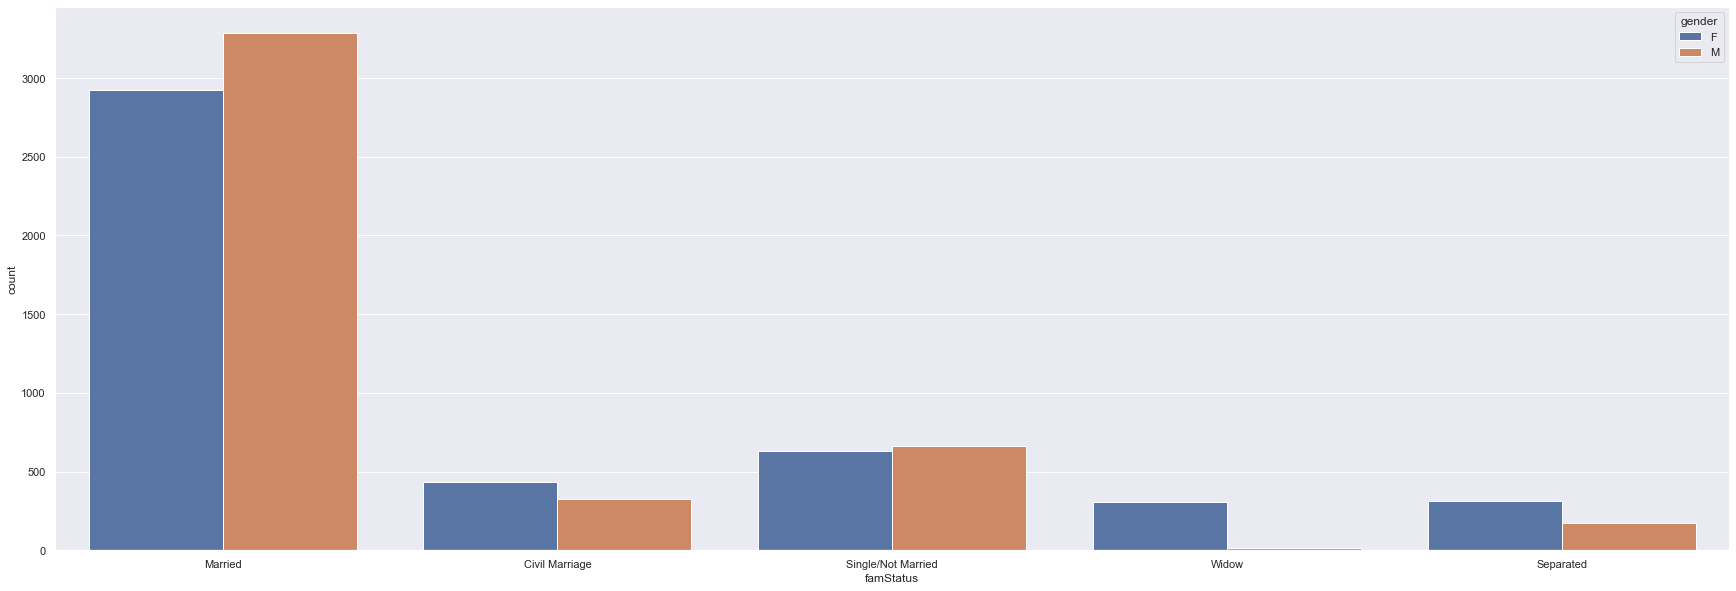

In [77]:
sns.countplot(x='famStatus',hue='gender',data=balancedCat)
rcParams['figure.figsize'] = 30, 10

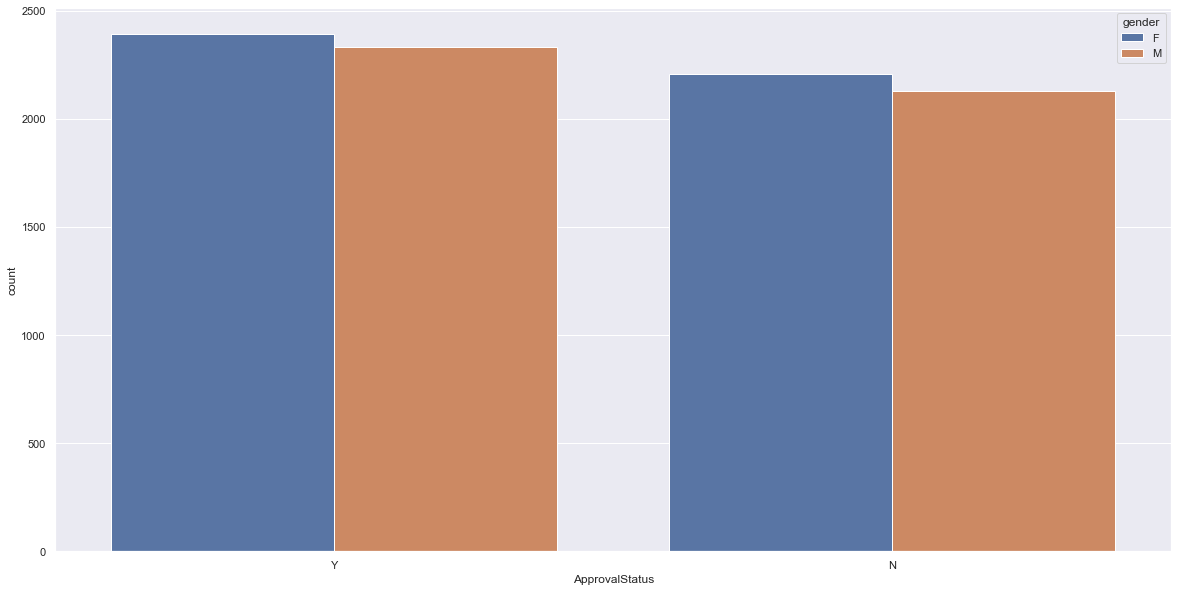

In [80]:
sns.countplot(x='ApprovalStatus',hue='gender',data=balancedCat)
rcParams['figure.figsize'] = 20, 30

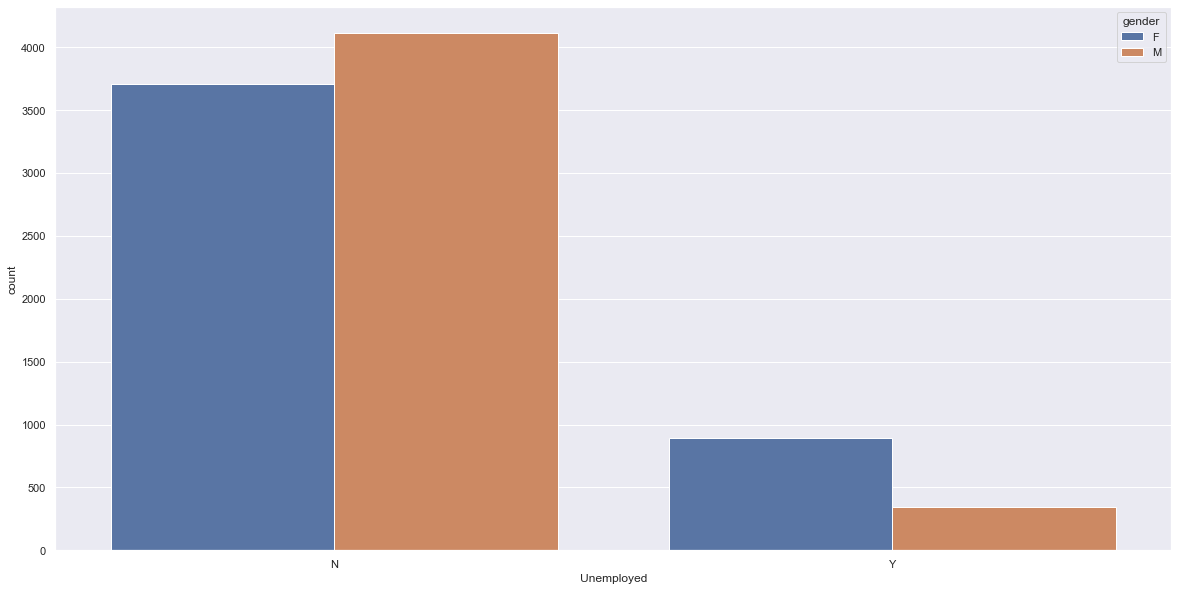

In [83]:
sns.countplot(x='Unemployed',hue='gender',data=balancedCat)
rcParams['figure.figsize'] = 20, 5

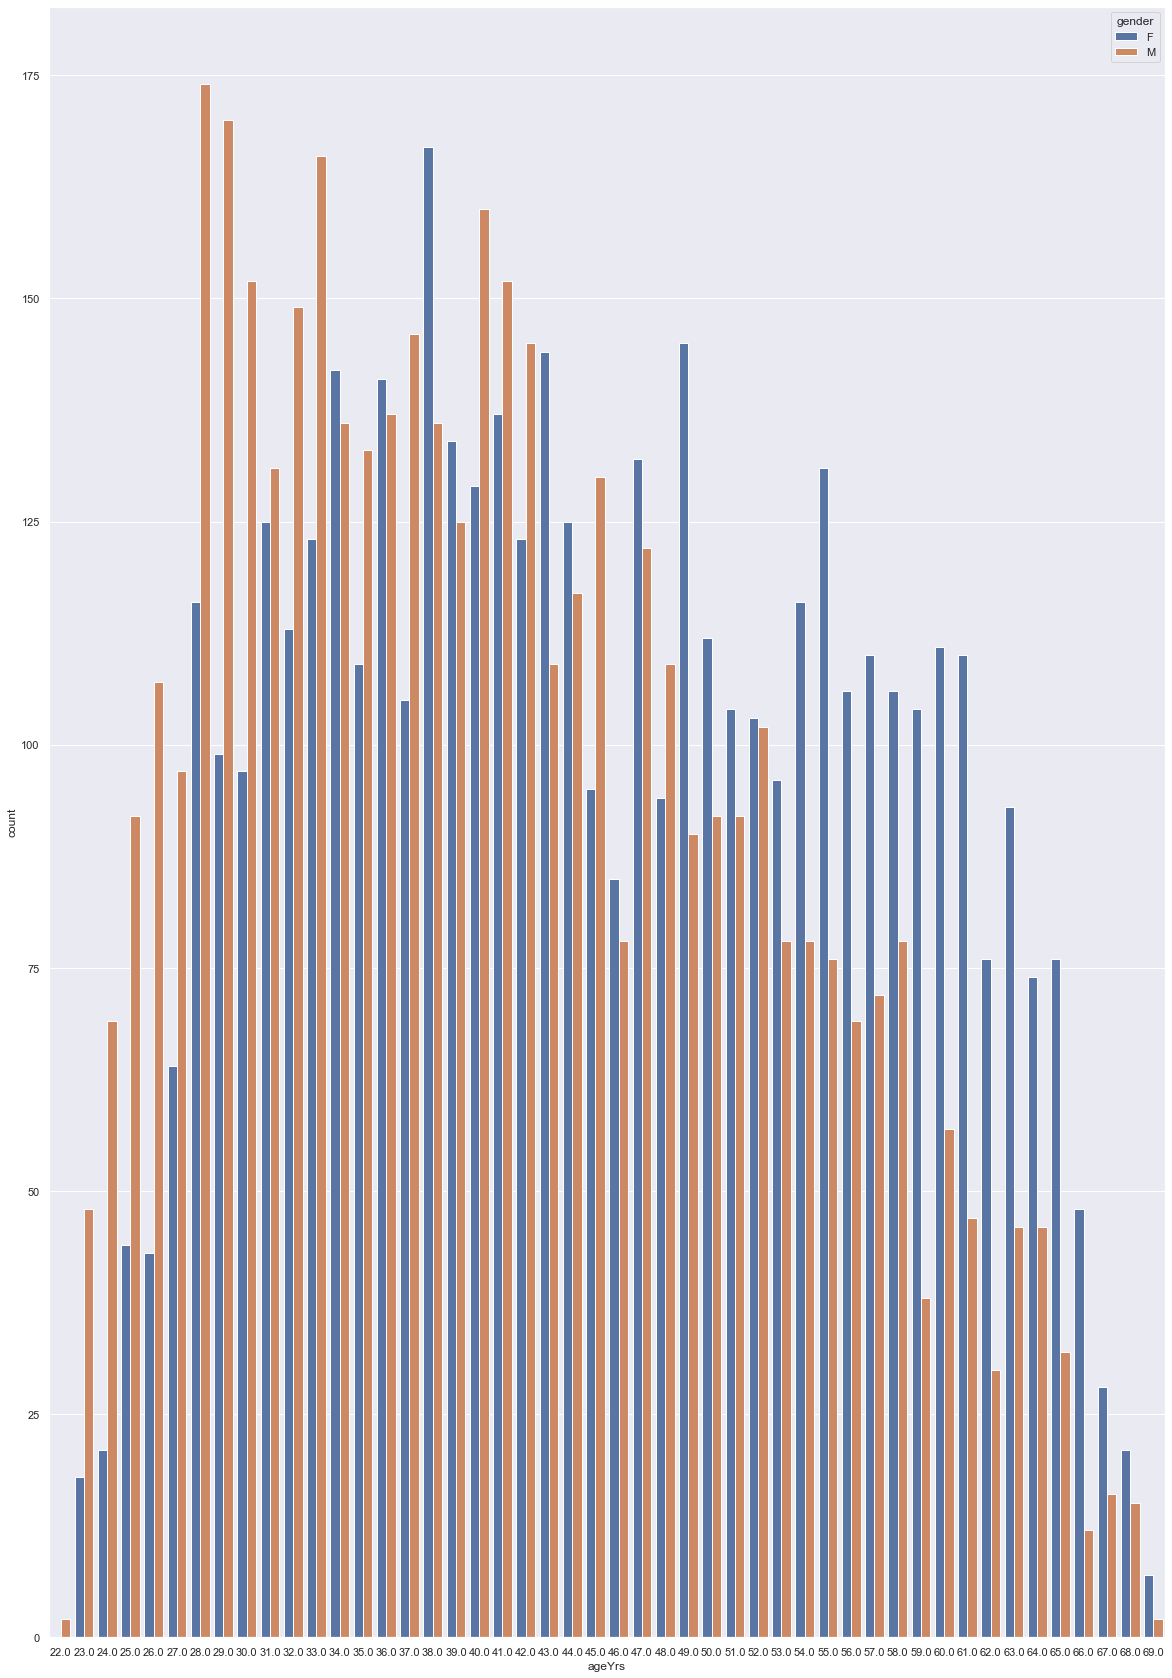

In [85]:
sns.countplot(x='ageYrs',hue='gender',data=balancedCat)
rcParams['figure.figsize'] = 20, 30

In [86]:
# Save categorical balanced dataset to csv
balancedCat.to_csv("../Data/balancedCat.csv")